In this assignment we will explore the Array of Things dataset. In particular, we will explore the pre-processed reduced dataset in the folder `/projects/b1045/AoT/AoT_reduced_data_10m`

To help us explore the dataset, and learn `pandas` and a little bit of `cartopy` while exploring, let's try to answer the following questions.

1. How many types of sensors are available in the AoT? What are they?
2. How many nodes are there in the AoT? List all the node ids.
3. Do all stations have the same set of sensors?
4. What node is closest to where you live?
5. What sensors are available in that node?
6. What is the time period of the data availability of a sensor in that node?
7. Plot a time series of any available sensor in the node closest to you.
8. Plot the map of locations of 4 sensors.

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature

In [3]:
data_file = './AoT/data.csv'
nodeid_file = './AoT/nodes.csv'
provenance_file = './AoT/provenance.csv'
sensors_file = './AoT/sensors.csv'

In [4]:
df_data = pd.read_csv(data_file)
df_nodeid = pd.read_csv(nodeid_file)

In [5]:
df_prov = pd.read_csv(provenance_file)
df_sensors = pd.read_csv(sensors_file)

**1. How many types of sensors are available in the AoT? What are they?**

In [6]:
df_sensors.sensor.unique()

array(['co', 'h2s', 'no2', 'o3', 'oxidizing_gases', 'reducing_gases',
       'so2', 'opc_n2', 'pms7003', 'hih4030', 'htu21d', 'bmp180',
       'pr103j2', 'tmp112', 'tsys01', 'microphone', 'tsl260rd',
       'apds_9006_020', 'mlx75305', 'tsl250rd', 'hmc5883l',
       'spv1840lr5h_b', 'ml8511', 'mma8452q', 'loadavg', 'mem', 'uptime',
       'hih6130', 'si1145', 'temperatures', 'tmp421', 'net_broadband',
       'net_lan', 'net_usb', 'lps25h', 'sht25', 'chemsense', 'metsense',
       'at0', 'at1', 'at2', 'at3', 'current', 'failures', 'heartbeat',
       'enabled'], dtype=object)

In [7]:
print("There are {0} sensors in the AoT.".format(len(df_sensors.sensor.unique())))

There are 46 sensors in the AoT.


**2. How many nodes are there in the AoT?**

In [8]:
df_nodeid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
node_id            91 non-null object
project_id         91 non-null object
vsn                91 non-null object
address            91 non-null object
lat                91 non-null float64
lon                91 non-null float64
description        91 non-null object
start_timestamp    91 non-null object
end_timestamp      5 non-null object
dtypes: float64(2), object(7)
memory usage: 6.5+ KB


In [9]:
print('There are {0} nodes in the AoT.'.format(len(df_nodeid)))

There are 91 nodes in the AoT.


If you're curious how the contents look like, print the head of the dataframe.

In [10]:
df_nodeid.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,NaN
3,001e0610ba16,AoT_Chicago,010,Ohio St & Grand Ave Chicago IL,41.891964,-87.611603,AoT Chicago (S) [C],2017/12/01 00:00:00,2018/06/04 00:00:00
4,001e0610ba8b,AoT_Chicago,018,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN


**List all the node ids.**

In [11]:
df_data.node_id.unique()

array(['001e0610ba57', '001e0610bc10', '001e0610e537', '001e0610ef27',
       '001e0610f513', '001e0610f6dd', '001e0610eef2', '001e061135cb',
       '001e06113ace', '001e061144c0', '001e0610ee33', '001e0610fb4c',
       '001e06112e77', '001e06113ad6', '001e06113dbc', '001e061144be',
       '001e0611462f', '001e0610ee41', '001e0610f6db', '001e0610ba8b',
       '001e0610ba8f', '001e0610ef68', '001e0610b9e9', '001e0610e532',
       '001e0610e539', '001e0610ee82', '001e0610f732', '001e06113a48',
       '001e0610ba13', '001e0610e538', '001e0610ee61', '001e0610eef4',
       '001e0610ef73', '001e0610e809', '001e0610ee6f', '001e06115379',
       '001e06109416', '001e0610bc12', '001e061130f4', '001e06115365',
       '001e0611441e', '001e0610ba46', '001e0610ef29', '001e0610f668',
       '001e06115369', '001e0610f703', '001e06114500', '001e0611537d',
       '001e0610bbff', '001e0610ee43', '001e0610ee5d', '001e06113ad8',
       '001e06113d22', '001e061146d6', '001e06114fd4', '001e0610f730',
      

In [12]:
#lat = df_nodeid.lat
#lon = df_nodeid.lon
#nodeids = df_nodeid.node_id

In [13]:
df_data.head()

,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average
0,2018/05/01 00:05:00,001e0610ba57,lightsense,hih6130,temperature,999.95,26,38.460
1,2018/05/01 00:05:00,001e0610ba57,lightsense,tmp421,temperature,907.26,26,34.895
2,2018/05/01 00:05:00,001e0610ba57,metsense,bmp180,temperature,656.60,26,25.254
3,2018/05/01 00:05:00,001e0610ba57,metsense,htu21d,temperature,650.58,26,25.022
4,2018/05/01 00:05:00,001e0610ba57,metsense,pr103j2,temperature,656.25,26,25.240


**3. Do all stations have the same set of sensors?**

To answer this, print the how many of each sensor there are in the entire dataframe. If the stations have the same set of sensors, each sensor would have the same count.

In [14]:
df_data.sensor.value_counts()

htu21d             1526556
pr103j2            1459974
tsys01             1420432
tmp421             1417525
hih6130            1417525
bmp180             1417523
tmp112             1351436
lps25h              767120
oxidizing_gases     767116
at2                 767116
at1                 767116
at0                 767116
so2                 767116
reducing_gases      767116
h2s                 767116
at3                 767116
co                  767116
o3                  767116
no2                 767116
current             565360
sht25               199845
Name: sensor, dtype: int64

**4. Which node is closest to where you live?**

In [85]:
#my_location = [42.048531, -87.688803]
my_location = [41.95, -87.68]

In [86]:
lat = df_nodeid.lat.values
lon = df_nodeid.lon.values
nodeids = df_nodeid.node_id.values

In [87]:
distances = np.sqrt((lat-my_location[0])**2+(lon-my_location[1])**2)

In [88]:
closest_idx = np.where(distances==distances.min())[0][0]

In [89]:
closest_idx

81

In [90]:
nodeids[closest_idx]

'001e06113d32'

In [91]:
len(df_data)

19981572

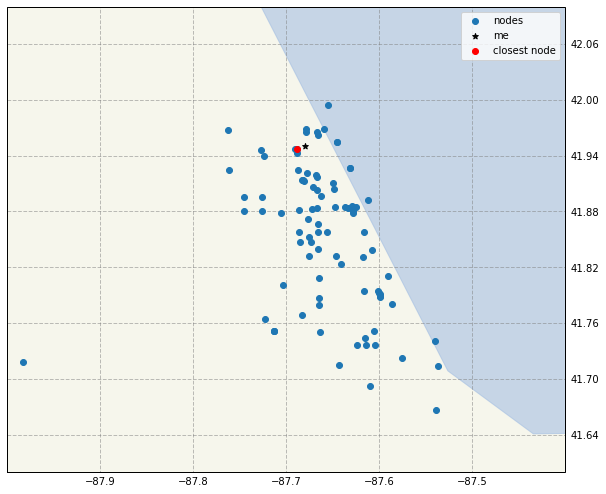

In [92]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-88, -87.4, 41.6, 42.1])

ax.add_feature(cartopy.feature.LAND,alpha=0.5)
ax.add_feature(cartopy.feature.LAKES,alpha=0.5)

ax.scatter(lon,lat,transform=ccrs.PlateCarree(),zorder=10,label='nodes')
ax.scatter(my_location[1],my_location[0],transform=ccrs.PlateCarree(),marker='*',color='k',zorder=10,label='me')
ax.scatter(lon[closest_idx],lat[closest_idx],transform=ccrs.PlateCarree(),color='r',zorder=10,label='closest node')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False

plt.legend()

**5. What sensors are available in that node?**

In [93]:
df_data_sub = df_data.loc[(df_data.node_id==nodeids[closest_idx])]

In [94]:
df_data_sub

,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average


In [82]:
df_data_sub.sensor.unique()

array(['hih6130', 'tmp421', 'bmp180', 'htu21d', 'pr103j2', 'tmp112',
       'tsys01', 'at0', 'at1', 'at2', 'at3', 'co', 'h2s', 'lps25h', 'no2',
       'o3', 'oxidizing_gases', 'reducing_gases', 'so2', 'sht25'],
      dtype=object)

In [83]:
len(df_data_sub)

23284

**6. What is the time period of the data availability of a sensor in that node?**

In [30]:
print('Data is available from {0} to {1}'.format(df_data_sub.timestamp.values[0],df_data_sub.timestamp.values[-1]))

Data is available from 2018/05/10 10:35:00 to 2018/10/31 23:55:00


**7. Plot a time series of any available sensor in the node closest to you.**

Pick a sensor that has a lot of data points.

In [31]:
df_data_sub.sensor.value_counts()

at3                1919
reducing_gases     1919
at0                1919
oxidizing_gases    1919
h2s                1919
o3                 1919
so2                1919
lps25h             1919
at1                1919
at2                1919
co                 1919
no2                1919
sht25               144
bmp180               16
hih6130              16
tmp112               16
htu21d               16
pr103j2              16
tmp421               16
tsys01               16
Name: sensor, dtype: int64

In [32]:
df_data_sub_so2 = df_data_sub.loc[df_data_sub.sensor=='so2']

In [33]:
df_data_sub_so2.head()

,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average
6513251,2018/06/21 17:15:00,001e0610b9e5,chemsense,so2,concentration,9.073,1,9.073
13821357,2018/09/01 06:45:00,001e0610b9e5,chemsense,so2,concentration,-45.174,1,-45.174
18489129,2018/10/18 16:35:00,001e0610b9e5,chemsense,so2,concentration,887.680,9,98.631
18489239,2018/10/18 16:45:00,001e0610b9e5,chemsense,so2,concentration,1285.529,13,98.887
18490556,2018/10/18 16:55:00,001e0610b9e5,chemsense,so2,concentration,1782.881,18,99.049


In [34]:
dtimes = pd.to_datetime(df_data_sub_so2.timestamp)

C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(736985.6909722222, 736998.9965277778)

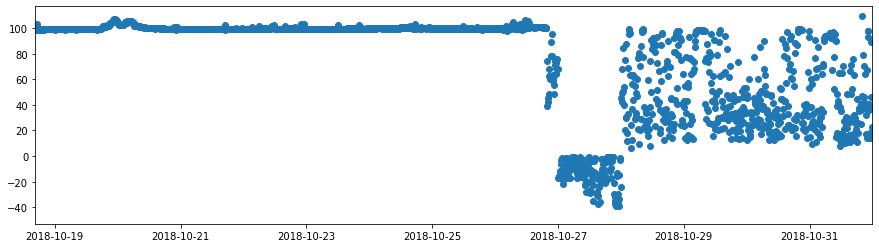

In [35]:
plt.figure(figsize=(15,4))
plt.plot_date(dtimes,df_data_sub_so2.value_hrf_average)
plt.xlim('2018/10/18 16:35:00','2018/10/31 23:55:00')

**8. Plot the map of locations of 4 sensors**

I'd pick the following sensors:
- htu21d
- tmp112
- h2s
- current

Select only the node ids and the sensors from the data dataframe.

In [36]:
df_nodeids_sensors = df_data[['node_id','sensor']]

Select only the node ids and the coordinates the from nodeid dataframe.

In [37]:
df_nodeid_coords = df_nodeid[['node_id','lat','lon']]

Now that we have two dataframes that both have the `node_id` column, we can link the sensor with the coordinates.

Filter the node_ids and sensors dataframe by selecting a specific sensor. 

In [38]:
def get_sensor_locations(sensorname):

    # filter dataframe by selecting only a specific sensor
    df_nodeid_sensor = df_nodeids_sensors.loc[(df_nodeids_sensors.sensor==sensorname)]
    # merge the sensor dataframe with the nodeid coords
    df_sensor_locations = df_nodeid_coords.merge(df_nodeid_sensor)
    # remove the duplicates
    df_sensor_locations = df_sensor_locations.drop_duplicates()
    
    return df_sensor_locations

In [39]:
df_htu21d_locs = get_sensor_locations('htu21d')
df_tmp112_locs = get_sensor_locations('tmp112')
df_h2s_locs = get_sensor_locations('h2s')
df_current_locs = get_sensor_locations('current')

In [40]:
print(len(df_htu21d_locs))
print(len(df_tmp112_locs))
print(len(df_h2s_locs))
print(len(df_current_locs))

81
79
52
8


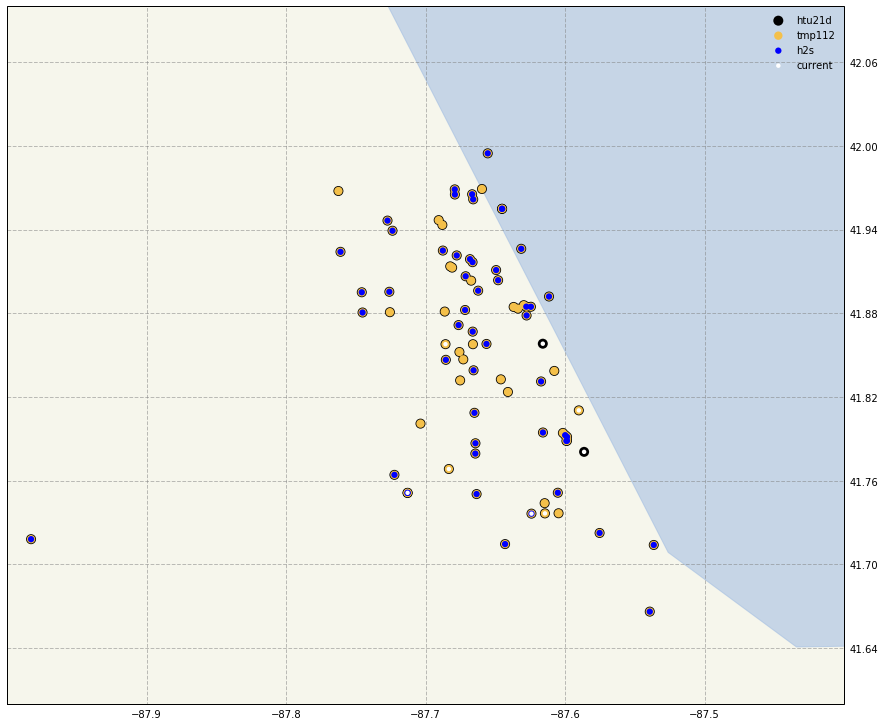

In [46]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-88, -87.4, 41.6, 42.1])

ax.add_feature(cartopy.feature.LAND,alpha=0.5)
ax.add_feature(cartopy.feature.LAKES,alpha=0.5)

ax.scatter(df_htu21d_locs.lon,df_htu21d_locs.lat,transform=ccrs.PlateCarree(),zorder=10,color='k',s=100,edgecolor='None',label='htu21d')
ax.scatter(df_tmp112_locs.lon,df_tmp112_locs.lat,transform=ccrs.PlateCarree(),zorder=10,color='#f4c04a',s=70,edgecolor='None',label='tmp112')
ax.scatter(df_h2s_locs.lon,df_h2s_locs.lat,transform=ccrs.PlateCarree(),zorder=10,color='b',s=40,edgecolor='None',label='h2s')
ax.scatter(df_current_locs.lon,df_current_locs.lat,transform=ccrs.PlateCarree(),zorder=10,color='w',s=20,edgecolor='None',label='current')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_left = False

legend = plt.legend(frameon = 0)

In [22]:
node_ids = df_nodeid.node_id

In [25]:
lats = df_nodeid.lat.tolist()
lons = df_nodeid.lon.tolist()

In [27]:
my_house_lat = 41.95
my_house_lon = -87.68

In [48]:
lat,lon = my_house_lat,my_house_lon

In [49]:
lat_diff = [(lat-i) for i in lats]
lon_diff = [(lon-i) for i in lons]

In [50]:
for i in lat_diff:
    a = i**2
    index = lat_diff.index(i)
    lat_diff[index] = a

In [51]:
for i in lon_diff:
    b = i**2
    index = lon_diff.index(i)
    lon_diff[index] = b

In [53]:
np_lat_diff = np.array(lat_diff)
np_lon_diff = np.array(lon_diff)
total_diff_list = (np_lat_diff + np_lon_diff).tolist()

In [55]:
total_diff = [math.sqrt(i) for i in total_diff_list]

In [58]:
closest_node = min(total_diff)

In [59]:
closest_node_index = total_diff.index(closest_node)

In [60]:
closest_node_index

81

In [67]:
node_name = node_ids[closest_node_index]

In [68]:
node_name

'001e06113d32'